# Imports

In [115]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


if __package__ is None:

    module_path = os.path.abspath(os.path.join('..'))
    sys.path.append(module_path)

    __package__ = os.path.basename(module_path)


from synbio_morpher.utils.misc.numerical import count_monotonic_group_lengths, find_monotonic_group_idxs, is_within_range
from synbio_morpher.utils.results.analytics.naming import get_analytics_types_all, get_true_names_analytics, get_true_interaction_cols

In [116]:
og_dir = '../data/generate_seqs_flexible/2023_04_17_205800/'
fn_og = os.path.join(og_dir, 'circuit_stats.csv')
mut_dir = '../data/ensemble_mutation_effect_analysis/2023_06_05_164913/mutation_effect_on_interactions_signal'
fn_mut = '../data/ensemble_mutation_effect_analysis/2023_06_05_164913/summarise_simulation/tabulated_mutation_info.csv'


In [117]:
data = pd.read_csv(fn_mut)


In [118]:
analytics = [c for c in get_true_names_analytics(data) if ('sensitivity' in c) or ('precision' in c)]

# STDs

In [119]:
# agg1 = data[(data['mutation_num'] != 0)].groupby(['circuit_name', 'mutation_num', 'sample_name'], as_index=False).agg({c: 'std' for c in analytics})
agg1 = data.groupby(['circuit_name', 'mutation_num', 'sample_name'], as_index=False).agg({c: 'std' for c in analytics})
agg1_mean = data.groupby(['circuit_name', 'mutation_num', 'sample_name'], as_index=False).agg({c: 'mean' for c in analytics})

Text(0.5, 0.98, 'Sensitivity and precision STDs:\nRNA_1 and RNA_2 have very similar distributions')

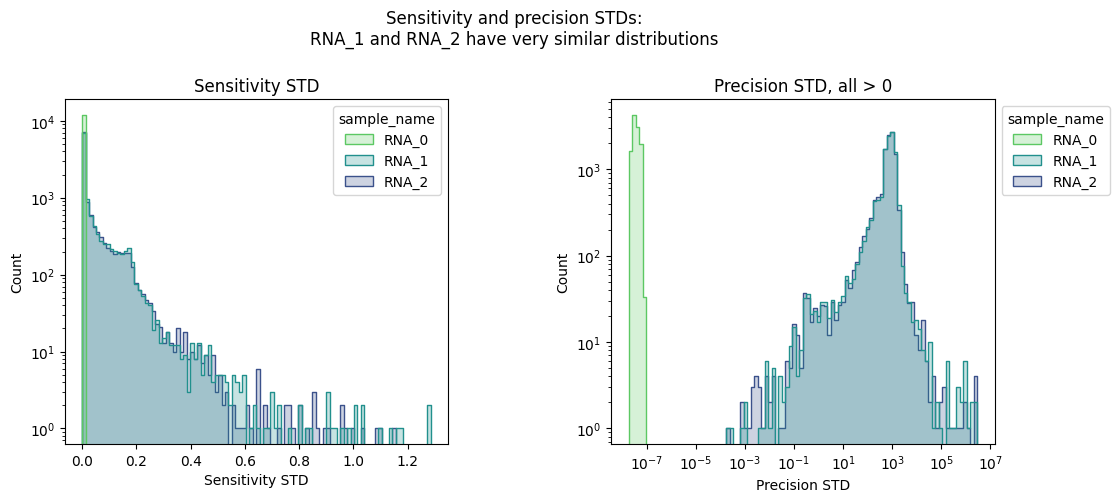

In [120]:
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.325, wspace=0.425, top=0.8)
ax = plt.subplot(1,2,1)
sns.histplot(agg1, x='sensitivity_wrt_species-6', hue='sample_name', element='step', log_scale=[False, True], bins=100, palette='viridis_r')
plt.title('Sensitivity STD')
plt.xlabel('Sensitivity STD')
ax = plt.subplot(1,2,2)
sns.histplot(agg1[agg1['precision_wrt_species-6'] > 0], x='precision_wrt_species-6', hue='sample_name', element='step', log_scale=[True, True], bins=100, palette='viridis_r')
plt.title('Precision STD, all > 0')
plt.xlabel('Precision STD')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.suptitle('Sensitivity and precision STDs:\nRNA_1 and RNA_2 have very similar distributions')

## Sensitivity

Text(0.5, 0.98, 'Sensitivity standard deviations (by RNA species)')

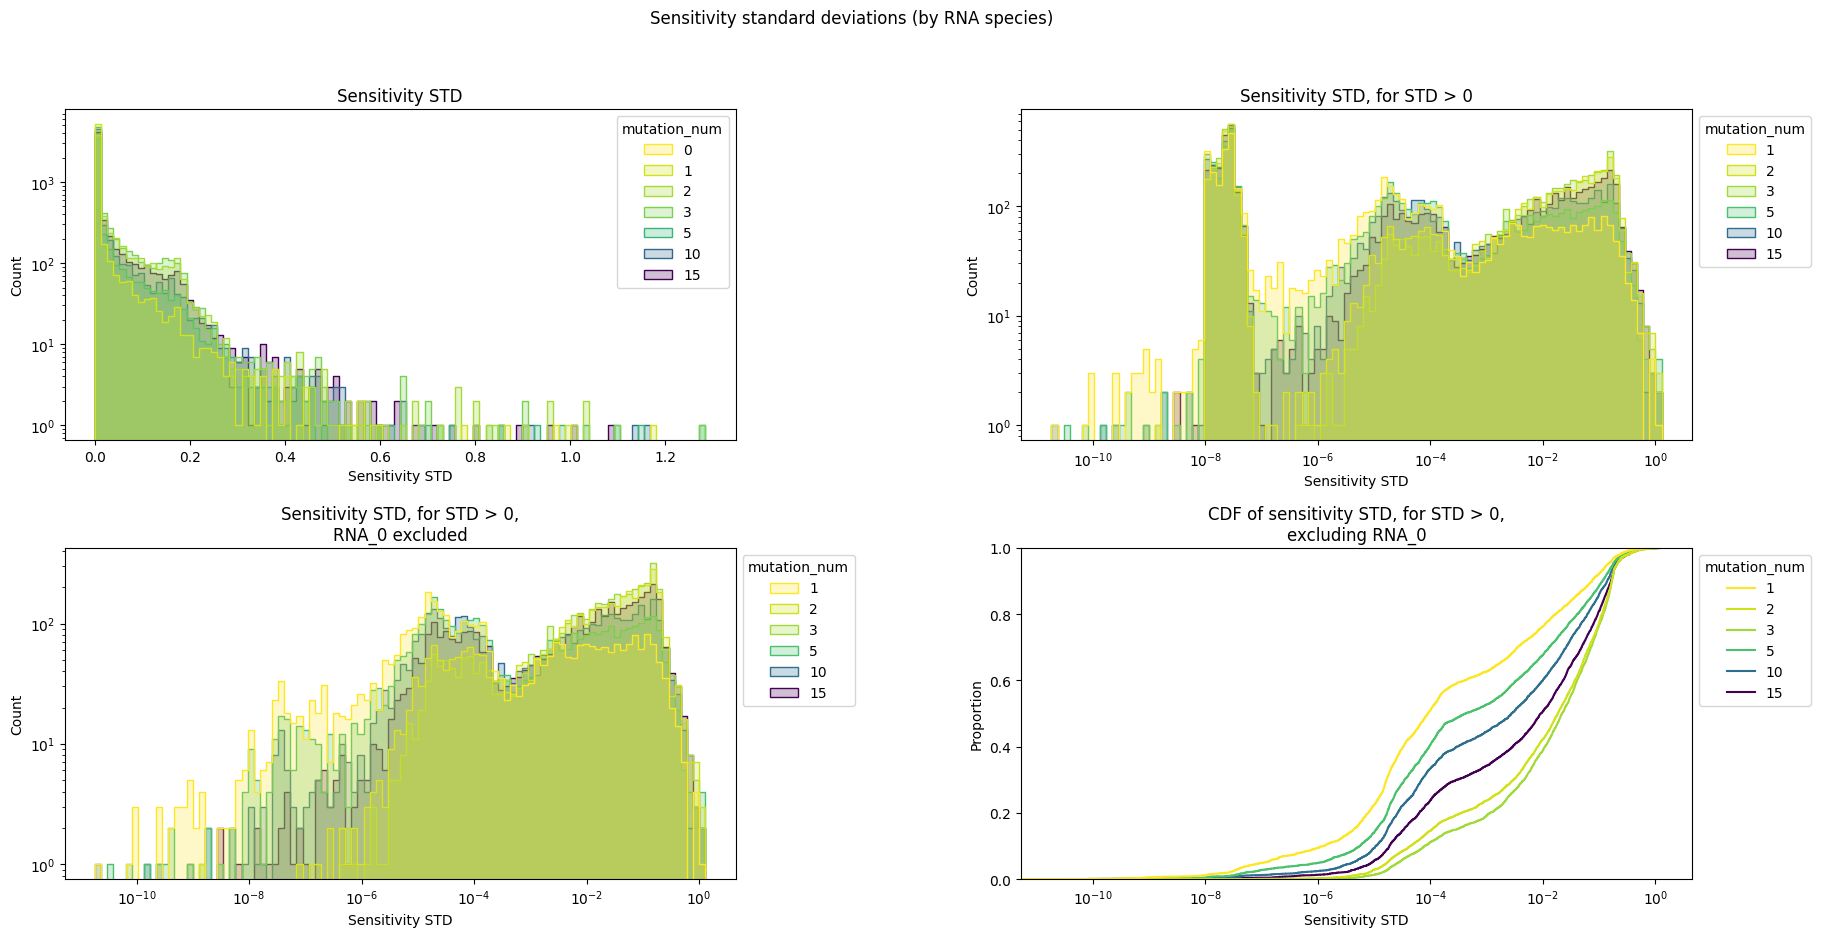

In [121]:
fig = plt.figure(figsize=(21, 10))
fig.subplots_adjust(hspace=0.325, wspace=0.425)
ax = plt.subplot(2,2,1)
sns.histplot(agg1, x='sensitivity_wrt_species-6', hue='mutation_num', element='step', log_scale=[False, True], bins=100, palette='viridis_r')
plt.title('Sensitivity STD')
plt.xlabel('Sensitivity STD')

ax = plt.subplot(2,2,2)
sns.histplot(agg1[agg1['sensitivity_wrt_species-6'] > 0], x='sensitivity_wrt_species-6', hue='mutation_num', element='step', log_scale=[True, True], bins=100, palette='viridis_r')
plt.title('Sensitivity STD, for STD > 0')
plt.xlabel('Sensitivity STD')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax = plt.subplot(2,2,3)
sns.histplot(agg1[(agg1['sensitivity_wrt_species-6'] > 0) & (agg1['sample_name'] != 'RNA_0')], x='sensitivity_wrt_species-6', hue='mutation_num', element='step', log_scale=[True, True], bins=100, palette='viridis_r')
plt.title('Sensitivity STD, for STD > 0,\nRNA_0 excluded')
plt.xlabel('Sensitivity STD')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax = plt.subplot(2,2,4)
sns.ecdfplot(agg1[(agg1['sensitivity_wrt_species-6'] > 0) & (agg1['sample_name'] != 'RNA_0')], x='sensitivity_wrt_species-6', hue='mutation_num', log_scale=[True, False], palette='viridis_r')
plt.title(f'CDF of sensitivity STD, for STD > 0,\nexcluding RNA_0')
plt.xlabel('Sensitivity STD')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.suptitle('Sensitivity standard deviations (by RNA species)')

## Precision

Text(0.5, 0.98, 'Precision standard deviations')

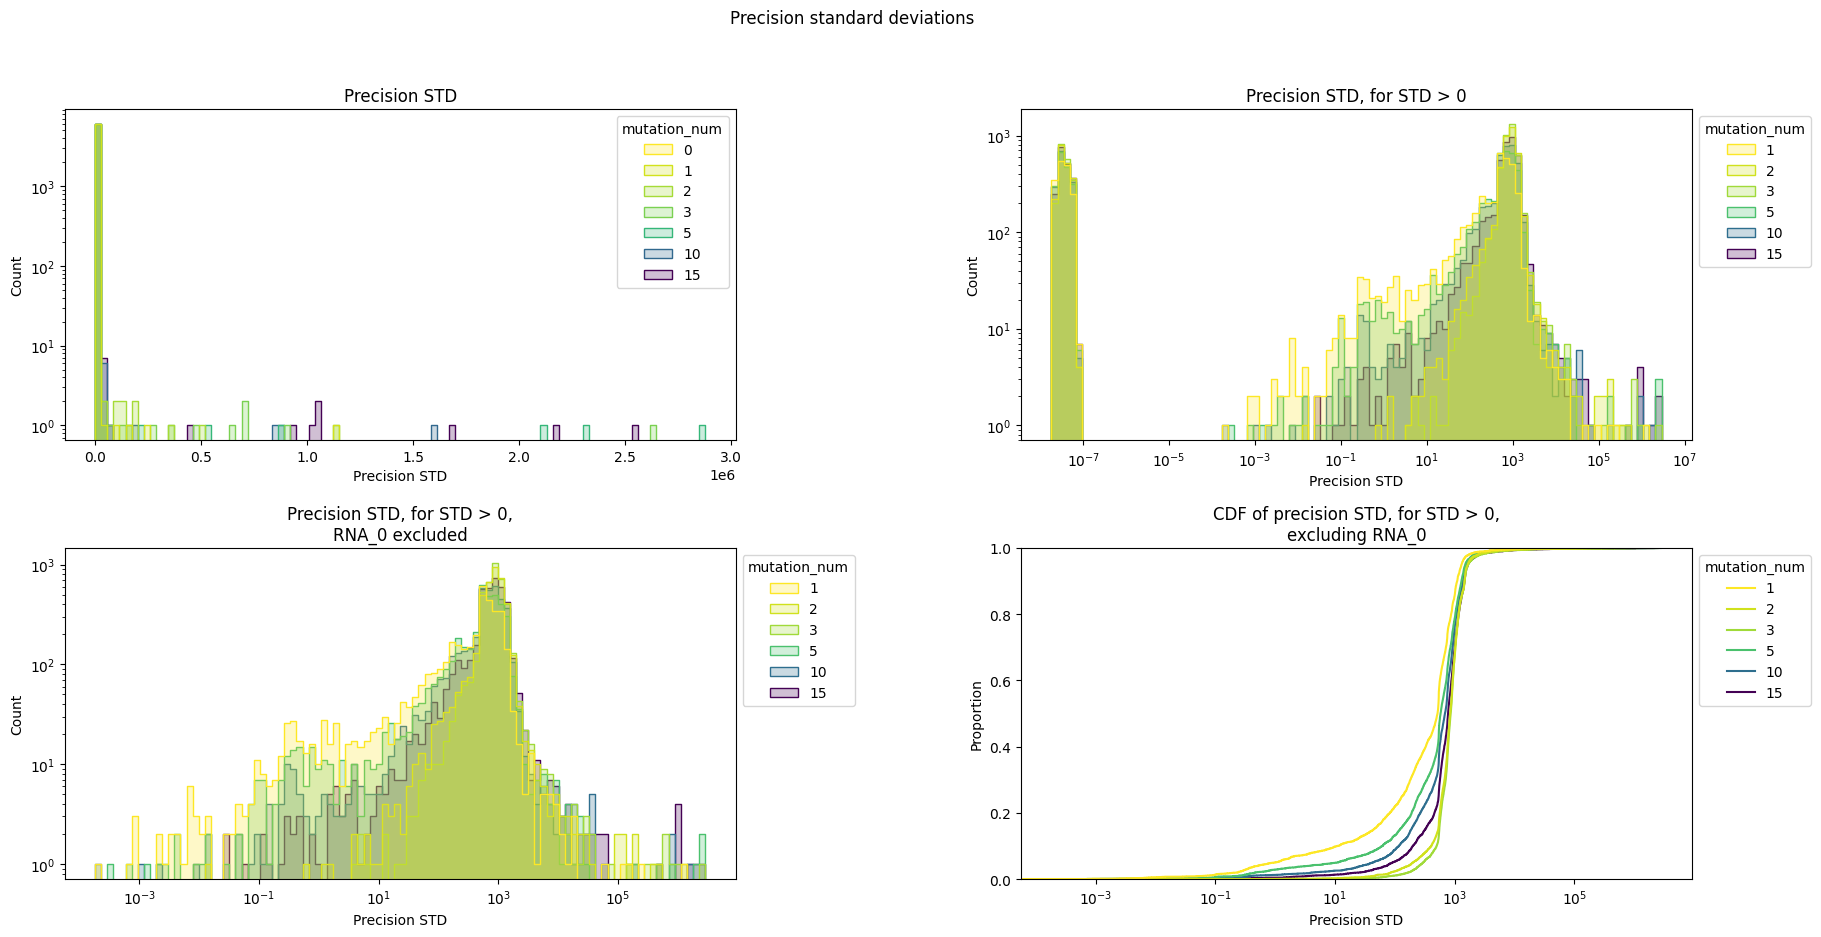

In [122]:
fig = plt.figure(figsize=(21, 10))
fig.subplots_adjust(hspace=0.325, wspace=0.425)
ax = plt.subplot(2,2,1)
sns.histplot(agg1, x='precision_wrt_species-6', hue='mutation_num', element='step', log_scale=[False, True], bins=100, palette='viridis_r')
plt.title('Precision STD')
plt.xlabel('Precision STD')

ax = plt.subplot(2,2,2)
sns.histplot(agg1[agg1['precision_wrt_species-6'] > 0], x='precision_wrt_species-6', hue='mutation_num', element='step', log_scale=[True, True], bins=100, palette='viridis_r')
plt.title('Precision STD, for STD > 0')
plt.xlabel('Precision STD')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax = plt.subplot(2,2,3)
sns.histplot(agg1[(agg1['precision_wrt_species-6'] > 0) & (agg1['sample_name'] != 'RNA_0')], x='precision_wrt_species-6', hue='mutation_num', element='step', log_scale=[True, True], bins=100, palette='viridis_r')
plt.title('Precision STD, for STD > 0,\nRNA_0 excluded')
plt.xlabel('Precision STD')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax = plt.subplot(2,2,4)
sns.ecdfplot(agg1[(agg1['precision_wrt_species-6'] > 0) & (agg1['sample_name'] != 'RNA_0')], x='precision_wrt_species-6', hue='mutation_num', log_scale=[True, False], palette='viridis_r')
plt.title(f'CDF of precision STD, for STD > 0,\nexcluding RNA_0')
plt.xlabel('Precision STD')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.suptitle('Precision standard deviations')

# STD of STDs

In [123]:
agg2 = agg1.groupby(['circuit_name'], as_index=False).agg({c: 'std' for c in analytics})

Text(0.5, 0.98, 'Sensitivity standard deviation of standard deviations')

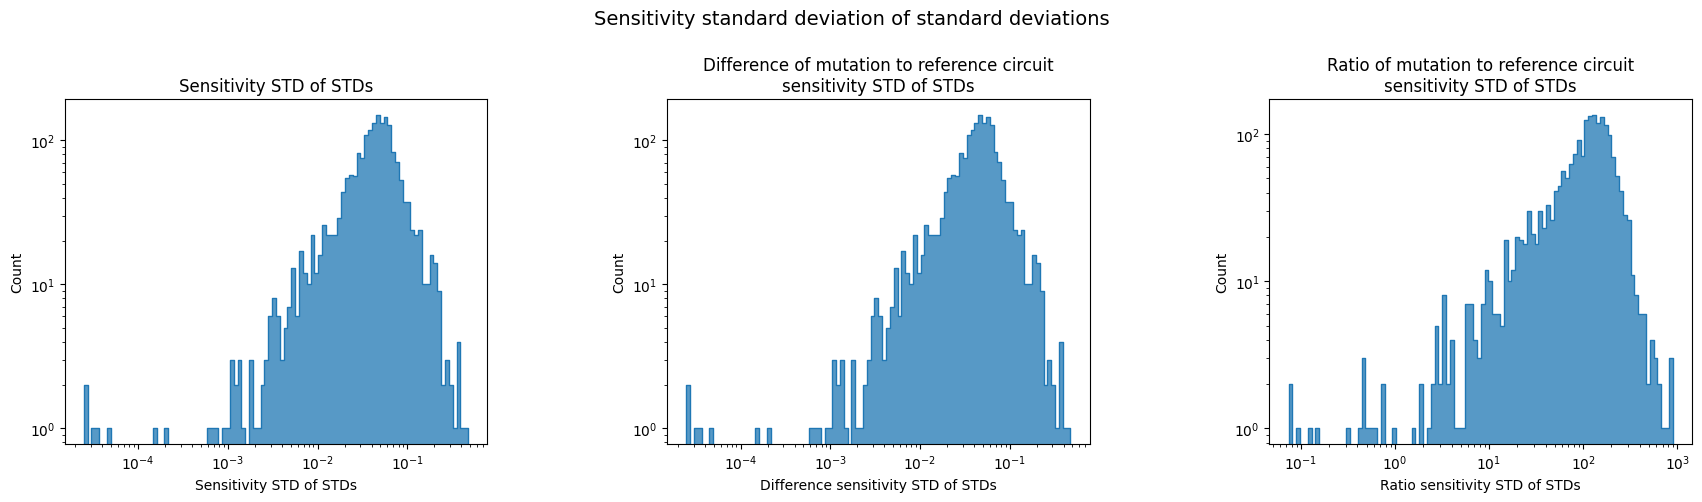

In [124]:

fig = plt.figure(figsize=(21, 5))
fig.subplots_adjust(hspace=0.325, wspace=0.425, top=0.8)

ax = plt.subplot(1,3,1)
sns.histplot(agg2, x='sensitivity_wrt_species-6', element='step', log_scale=[True, True], bins=100)
plt.title('Sensitivity STD of STDs')
plt.xlabel('Sensitivity STD of STDs')
ax = plt.subplot(1,3,2)
sns.histplot(agg2, x='sensitivity_wrt_species-6_diff_to_base_circuit', element='step', log_scale=[True, True], bins=100)
plt.title('Difference of mutation to reference circuit\nsensitivity STD of STDs')
plt.xlabel('Difference sensitivity STD of STDs')
ax = plt.subplot(1,3,3)
sns.histplot(agg2, x='sensitivity_wrt_species-6_ratio_from_mutation_to_base', element='step', log_scale=[True, True], bins=100)
plt.title('Ratio of mutation to reference circuit\nsensitivity STD of STDs')
plt.xlabel('Ratio sensitivity STD of STDs')

plt.suptitle('Sensitivity standard deviation of standard deviations', fontsize=14)

Text(0.5, 0.98, 'Precision standard deviation of standard deviations')

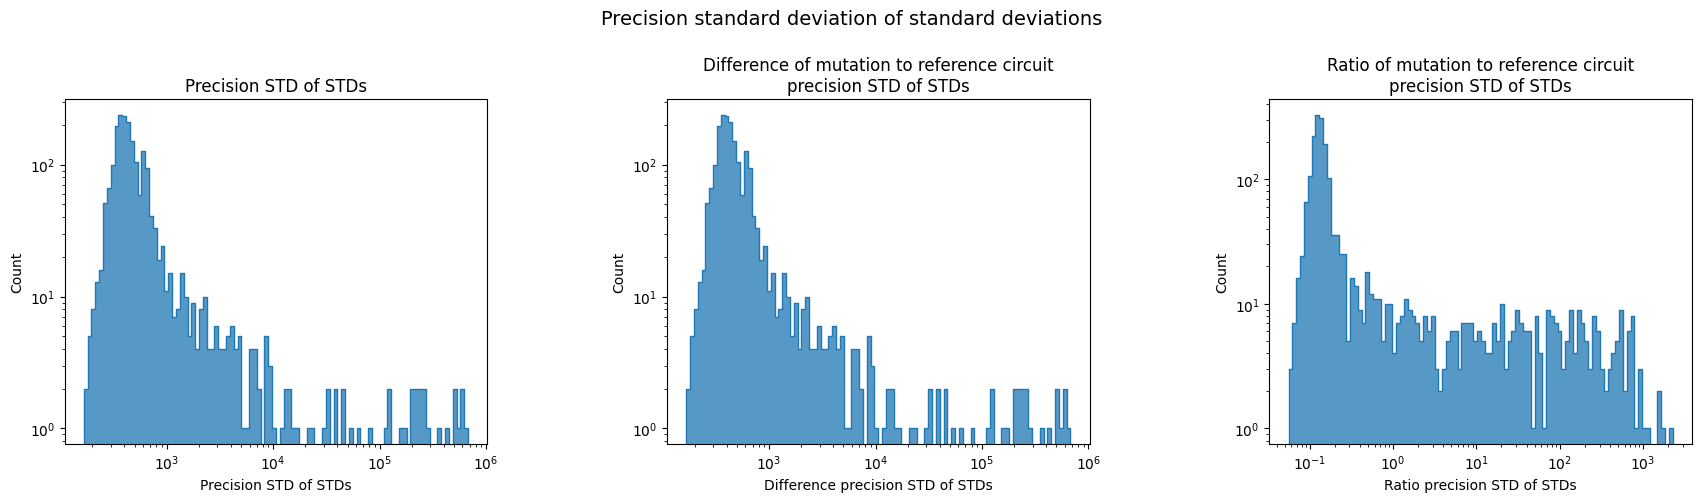

In [125]:

fig = plt.figure(figsize=(21, 5))
fig.subplots_adjust(hspace=0.325, wspace=0.425, top=0.8)

ax = plt.subplot(1,3,1)
sns.histplot(agg2, x='precision_wrt_species-6', element='step', log_scale=[True, True], bins=100)
plt.title('Precision STD of STDs')
plt.xlabel('Precision STD of STDs')
ax = plt.subplot(1,3,2)
sns.histplot(agg2, x='precision_wrt_species-6_diff_to_base_circuit', element='step', log_scale=[True, True], bins=100)
plt.title('Difference of mutation to reference circuit\nprecision STD of STDs')
plt.xlabel('Difference precision STD of STDs')
ax = plt.subplot(1,3,3)
sns.histplot(agg2, x='precision_wrt_species-6_ratio_from_mutation_to_base', element='step', log_scale=[True, True], bins=100)
plt.title('Ratio of mutation to reference circuit\nprecision STD of STDs')
plt.xlabel('Ratio precision STD of STDs')

plt.suptitle('Precision standard deviation of standard deviations', fontsize=14)

# Heatmap

Text(0, 0.5, 'Ratio mutation to reference precision STD')

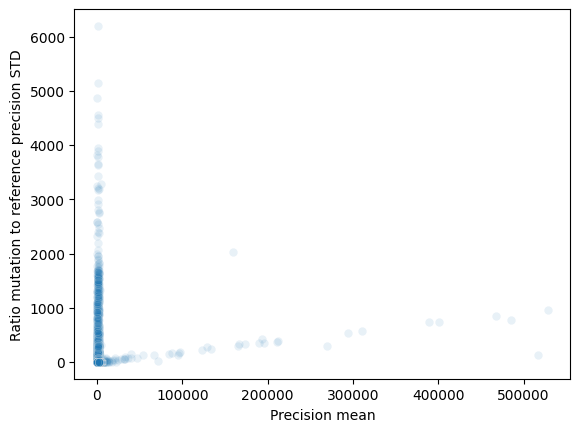

In [126]:
sns.scatterplot(x=agg1_mean['precision_wrt_species-6'], y=agg1['precision_wrt_species-6_ratio_from_mutation_to_base'], alpha=0.1)
plt.xlabel('Precision mean')
plt.ylabel('Ratio mutation to reference precision STD')

# Bimodality of sensitivity

In [128]:
data['num_interacting_all'] = data['num_interacting'] + data['num_self_interacting']

In [129]:
agg1['num_interacting_all'] = data.groupby(['circuit_name', 'mutation_num', 'sample_name'], as_index=False).agg({'num_interacting_all': 'mean'})['num_interacting_all']

In [130]:
agg1['energies'] = data.melt(['circuit_name', 'mutation_num', 'sample_name'], value_vars=get_true_interaction_cols(data, 'energies'), var_name='idx', value_name='energies').groupby(
    ['circuit_name', 'mutation_num', 'sample_name'], as_index=False).agg({'energies': 'mean'})['energies']

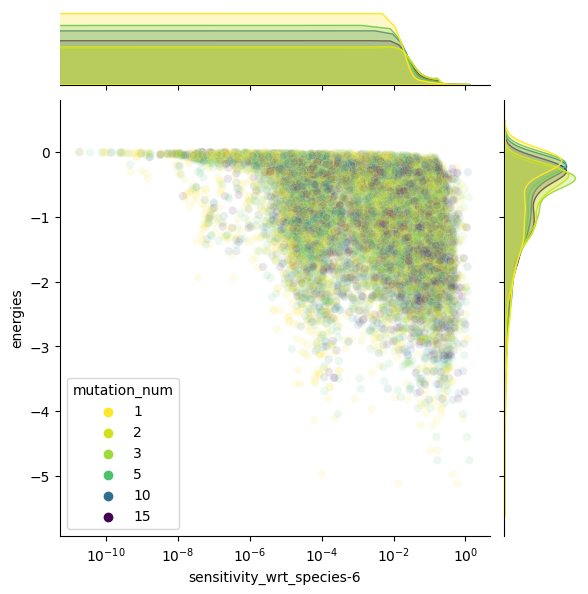

In [138]:

sns.jointplot(agg1[(agg1['sample_name'] != 'RNA_0') & (agg1['sensitivity_wrt_species-6'] > 0)], x='sensitivity_wrt_species-6', y='energies', hue='mutation_num', alpha=0.1, palette='viridis_r')
plt.xscale('log')